## Homework - Unsupervised

Kelompok 2:

*   Oei, Gabrielle Maureen B.S
*   Ummi Sarah
*   Arini Arumsari
*   Althaaf Athaayaa Daffa Qushayyizidane
*   Ruslan Hadi
*   Muhammad Ikhsan Hendriyana
*   Taufik Ismail
*   Jackson
*   Tsany Sutia

In [2]:
# Melakukan import library
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# import gdown

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.23.5
pandas version :  1.5.3
seaborn version :  0.12.2


In [3]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [5]:
# Melakukan import csv
df = pd.read_csv("flight.csv")
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
33546,40987,7/25/2011,7/25/2011,Female,4,beijing,beijing,CN,33.0,3/31/2014,...,4003.0,7601,2/27/2014,34,130.200000,228,0,0.832952,6023,0
59668,7997,5/17/2012,3/30/2013,Male,4,shenyangshi,liaoningsheng,CN,20.0,3/31/2014,...,785.0,3572,7/17/2013,259,109.000000,109,0,0.367716,321,0
50229,54527,12/18/2012,8/5/2013,Male,4,dalian,liaoning,CN,45.0,3/31/2014,...,2440.0,4570,8/7/2013,238,2.000000,2,0,0.595000,7115,16
44146,21247,8/11/2011,8/11/2011,Male,4,haerbin,heilongjiang,CN,31.0,3/31/2014,...,1872.0,5105,9/23/2013,191,438.000000,438,0,0.739745,3288,0
10342,25072,10/23/2012,10/23/2012,Male,4,fuzhou,fujian,CN,52.0,3/31/2014,...,8856.0,30225,2/1/2014,60,24.526316,91,0,0.709221,18136,0


# Describe Data

In [19]:
# Mengecek datatype dari masing-masing kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [20]:
from datetime import datetime
# df_date = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']
# date = [datetime.strptime(date, '%m-%d-%Y').date() for date in df_date]

df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'])
# df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'])
# df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'])
# df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'])
df

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2007-02-19,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2007-02-01,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,2008-08-22,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,2009-04-10,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62983,18375,2011-05-20,6/5/2013,Female,4,guangzhou,guangdong,CN,25.0,3/31/2014,...,0.0,1134,6/9/2013,297,4.000000,4,1,0.000000,12318,22
62984,36041,2010-03-08,9/14/2013,Male,4,foshan,guangdong,CN,38.0,3/31/2014,...,0.0,8016,1/3/2014,89,37.000000,60,14,0.000000,106972,43
62985,45690,2006-03-30,12/2/2006,Female,4,guangzhou,guangdong,CN,43.0,3/31/2014,...,0.0,2594,3/3/2014,29,166.000000,166,0,0.000000,0,0
62986,61027,2013-02-06,2/14/2013,Female,4,guangzhou,guangdong,CN,36.0,3/31/2014,...,0.0,3934,2/26/2013,400,12.000000,12,0,0.000000,0,0


In [21]:
# Melihat jumlah baris dan kolom
test = df.shape[0]

# Mengecek missing value ditiap fitur
missing_values_count = df.isnull().sum()
missing_values_count

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [22]:
# Pengelompokan kolom berdasarkan jenisnya
num = ['int64', 'int32', 'int16', 'float64', 'float32', 'float16']
num = df.select_dtypes(include=num)
num.drop(columns=['MEMBER_NO'], inplace=True)
num = num.columns
cats = ['object', 'bool']
cats = df.select_dtypes(include=cats)
cats = cats.columns


In [23]:
df[num].describe()

,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


In [24]:
df[cats].describe()

,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62985,60719,59740,62962,62988,62988
unique,3406,2,3234,1165,118,1,731
top,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,96,48134,9386,17509,57748,62988,959


In [25]:
# Mengecek unique value, modus, dan frekuensi modus dari tiap kolom
for i in df:
  x = df[i].mode()[0]
  y = df[i].value_counts()[x]
  z = df[i].nunique()
  print(f'Terdapat {z} unique values dan modus dari kolom {i} = {x} dengan frekuensi sebesar {y}')

Terdapat 62988 unique values dan modus dari kolom MEMBER_NO = 1 dengan frekuensi sebesar 1
Terdapat 3068 unique values dan modus dari kolom FFP_DATE = 2011-01-13 00:00:00 dengan frekuensi sebesar 184
Terdapat 3406 unique values dan modus dari kolom FIRST_FLIGHT_DATE = 2/16/2013 dengan frekuensi sebesar 96
Terdapat 2 unique values dan modus dari kolom GENDER = Male dengan frekuensi sebesar 48134
Terdapat 3 unique values dan modus dari kolom FFP_TIER = 4 dengan frekuensi sebesar 58066
Terdapat 3234 unique values dan modus dari kolom WORK_CITY = guangzhou dengan frekuensi sebesar 9386
Terdapat 1165 unique values dan modus dari kolom WORK_PROVINCE = guangdong dengan frekuensi sebesar 17509
Terdapat 118 unique values dan modus dari kolom WORK_COUNTRY = CN dengan frekuensi sebesar 57748
Terdapat 84 unique values dan modus dari kolom AGE = 47.0 dengan frekuensi sebesar 2727
Terdapat 1 unique values dan modus dari kolom LOAD_TIME = 3/31/2014 dengan frekuensi sebesar 62988
Terdapat 153 unique v

In [26]:
# Mengecek Pesebaran Data
nums = df[num]
for i in nums:
  minv = nums[i].min()
  maxv = nums[i].max()
  Q1 = nums[i].quantile(.25)
  Q3 = nums[i].quantile(.75)
  total_range = maxv-minv
  var = round(nums[i].var(),2)
  iqr = Q3-Q1
  print (f'Ukuran penyebaran dari kolom {i}, variance = {var}, range = {total_range}, IQR = {iqr}')

Ukuran penyebaran dari kolom FFP_TIER, variance = 0.14, range = 2, IQR = 0.0
Ukuran penyebaran dari kolom AGE, variance = 97.73, range = 104.0, IQR = 13.0
Ukuran penyebaran dari kolom FLIGHT_COUNT, variance = 197.39, range = 211, IQR = 12.0
Ukuran penyebaran dari kolom BP_SUM, variance = 266978807.69, range = 505308, IQR = 10313.0
Ukuran penyebaran dari kolom SUM_YR_1, variance = 65763181.68, range = 239560.0, IQR = 5571.0
Ukuran penyebaran dari kolom SUM_YR_2, variance = 75748549.22, range = 234188.0, IQR = 6065.75
Ukuran penyebaran dari kolom SEG_KM_SUM, variance = 439357007.32, range = 580349, IQR = 16524.25
Ukuran penyebaran dari kolom LAST_TO_END, variance = 33790.61, range = 730, IQR = 239.0
Ukuran penyebaran dari kolom AVG_INTERVAL, variance = 6009.02, range = 728.0, IQR = 58.62962963
Ukuran penyebaran dari kolom MAX_INTERVAL, variance = 15226.86, range = 728, IQR = 149.0
Ukuran penyebaran dari kolom EXCHANGE_COUNT, variance = 1.29, range = 46, IQR = 0.0
Ukuran penyebaran dari k

# Univariate Analysis

In [29]:
# Pengelompokan kolom berdasarkan jenisnya
print(num)
print(cats)

Index(['FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2',
       'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight'],
      dtype='object')
Index(['FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE',
       'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE'],
      dtype='object')


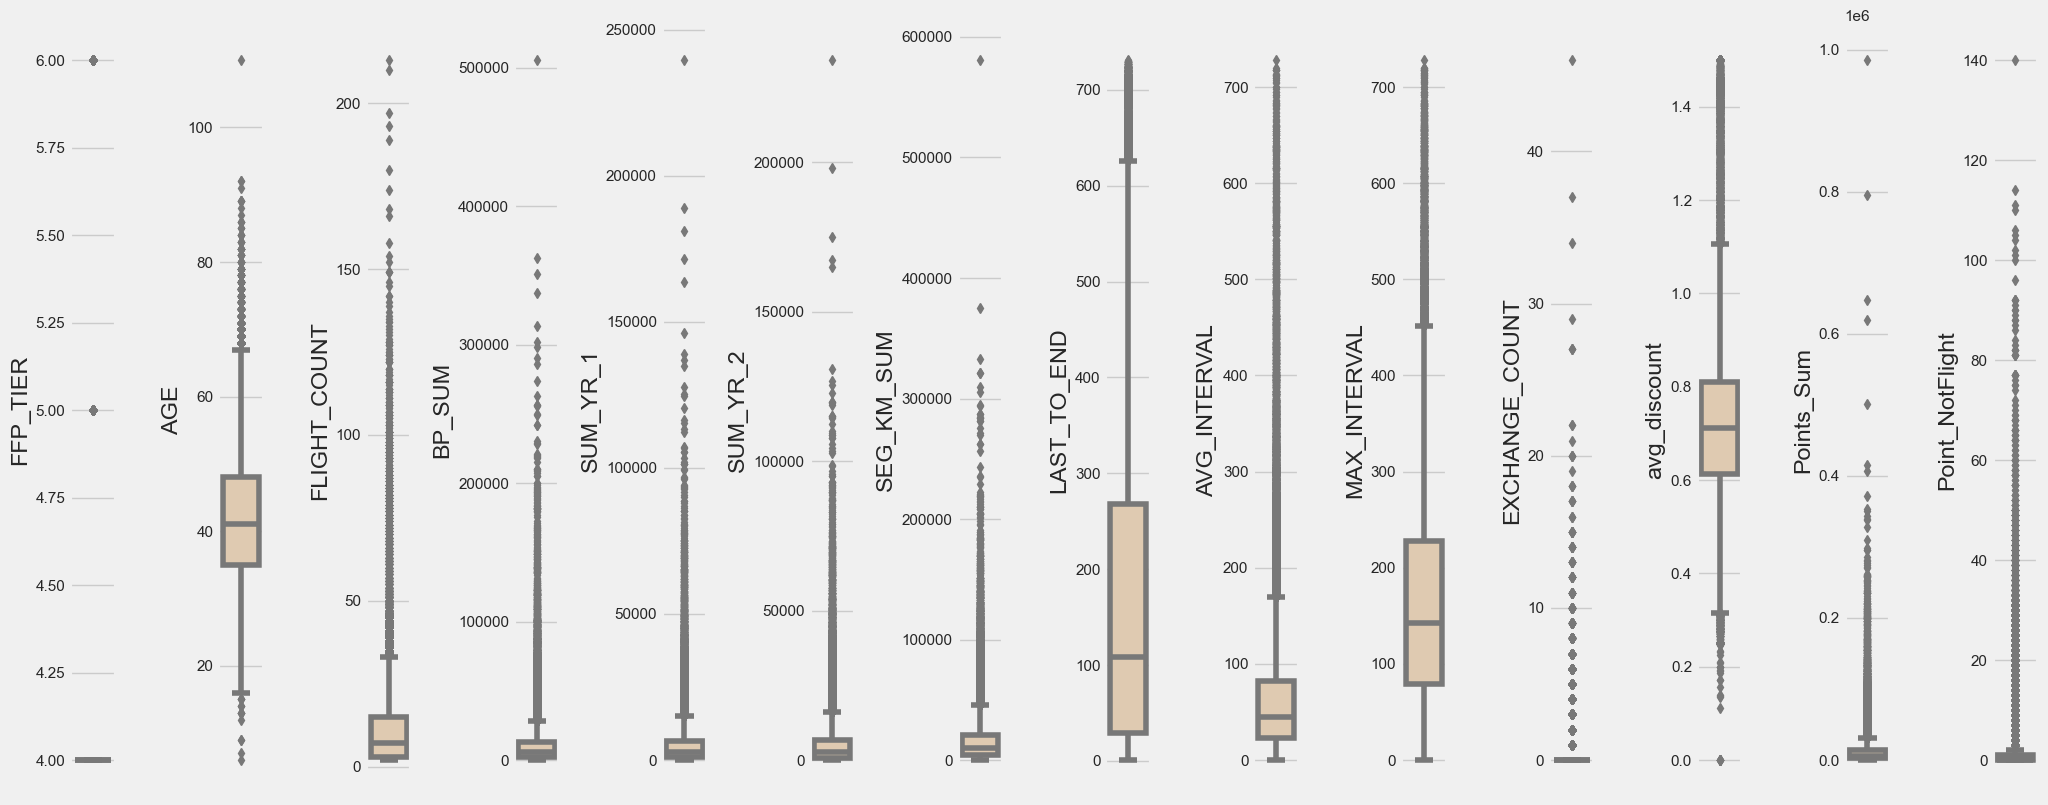

In [30]:
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.boxplot(y=df[num[i]], color = '#E7CBA9', data=df, orient = 'v')
    plt.tight_layout()

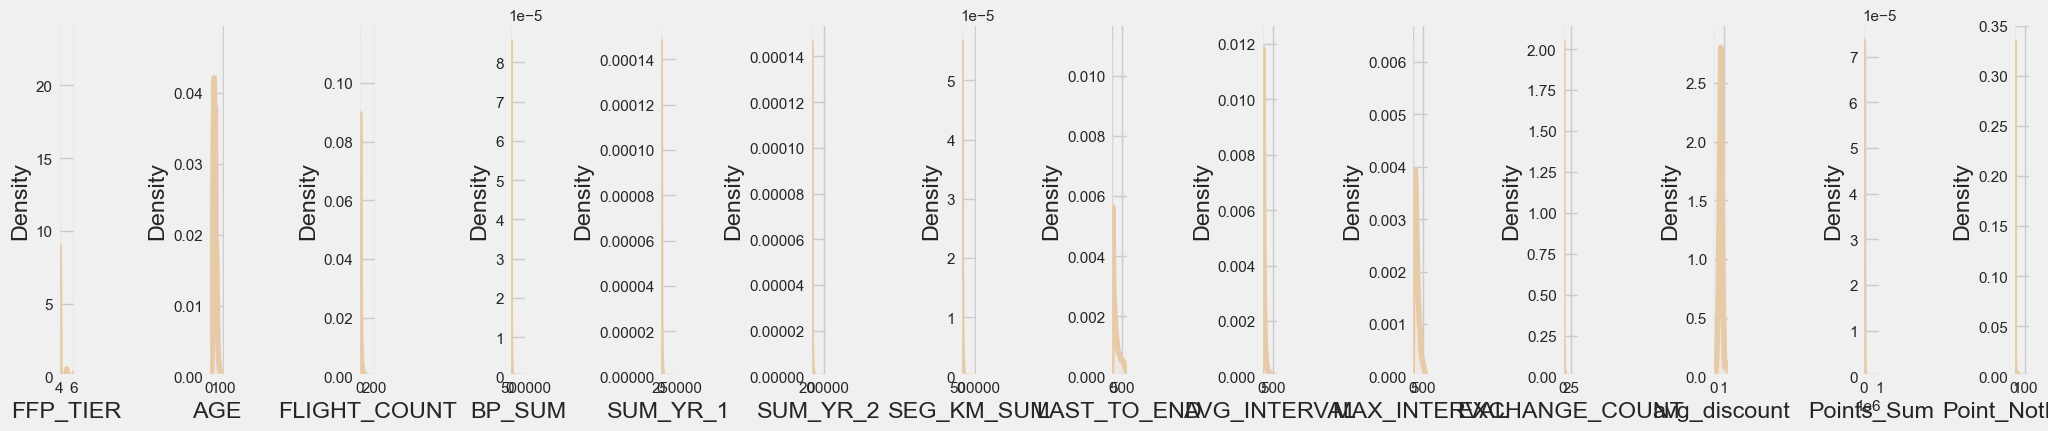

In [38]:
# plt.figure(figsize=(30, 15))
for i in range(0, len(num)):
    plt.subplot(2, len(num), i+1)
    sns.distplot(df[num[i]], color='#E7CBA9')
    plt.tight_layout()

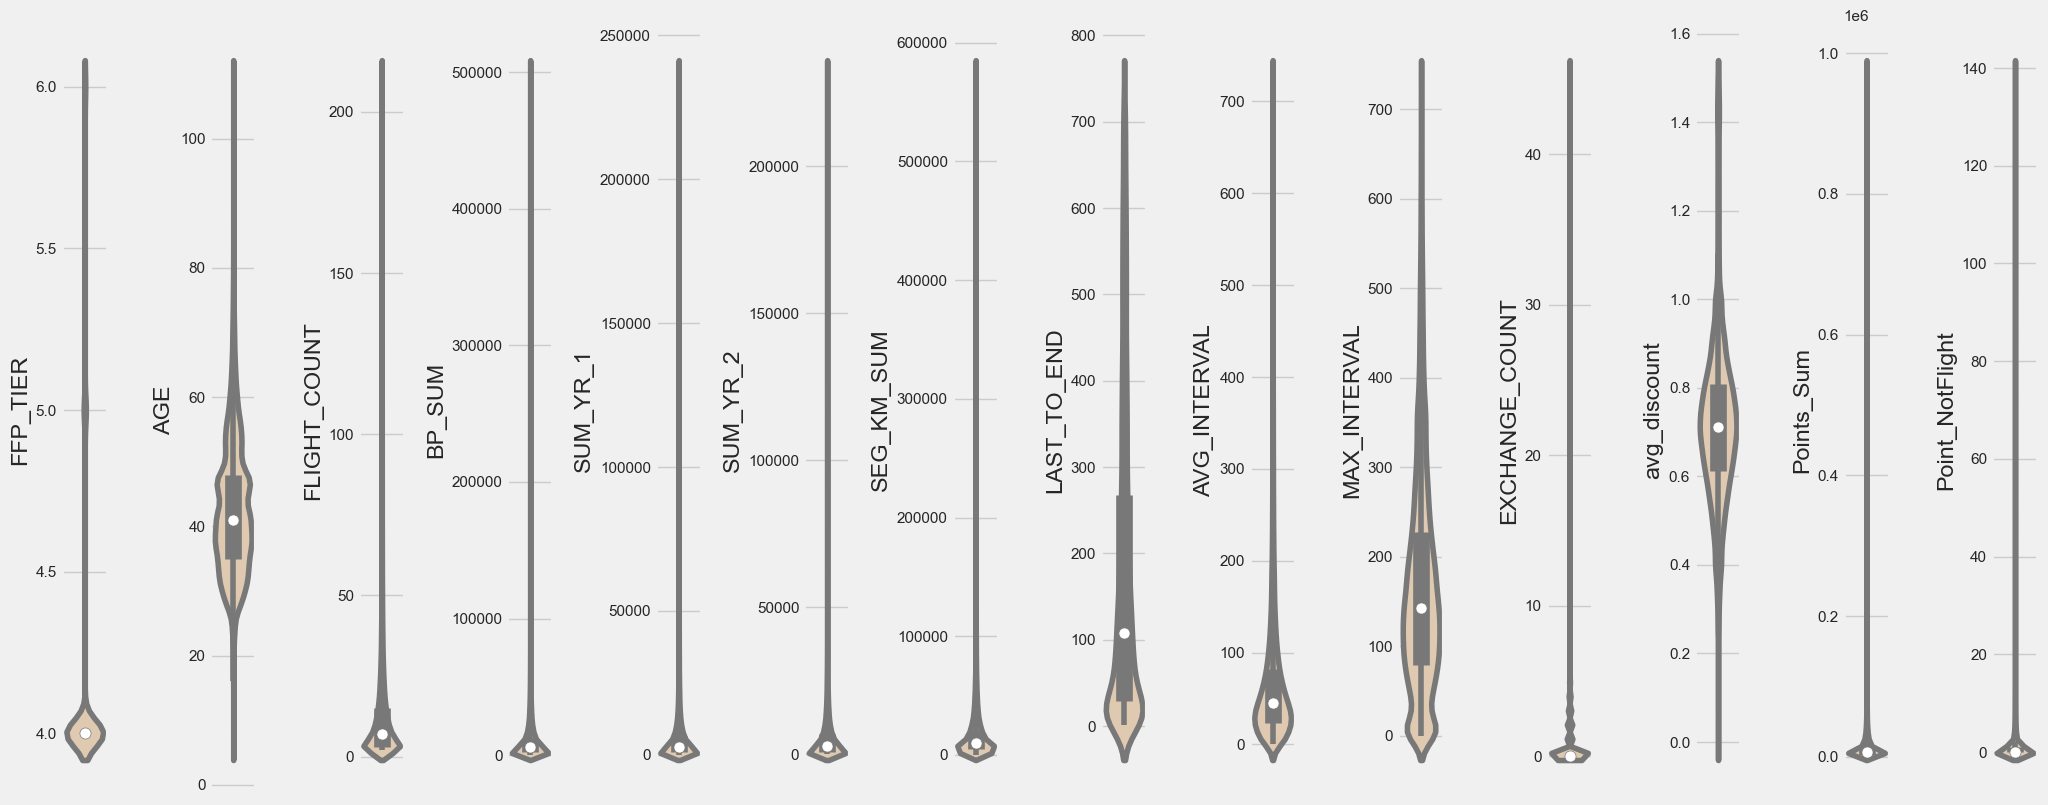

In [39]:
for i in range(0, len(num)):
    plt.subplot(1, len(num), i+1)
    sns.violinplot(y=df[num[i]], color='#E7CBA9', orient='v')
    plt.tight_layout()

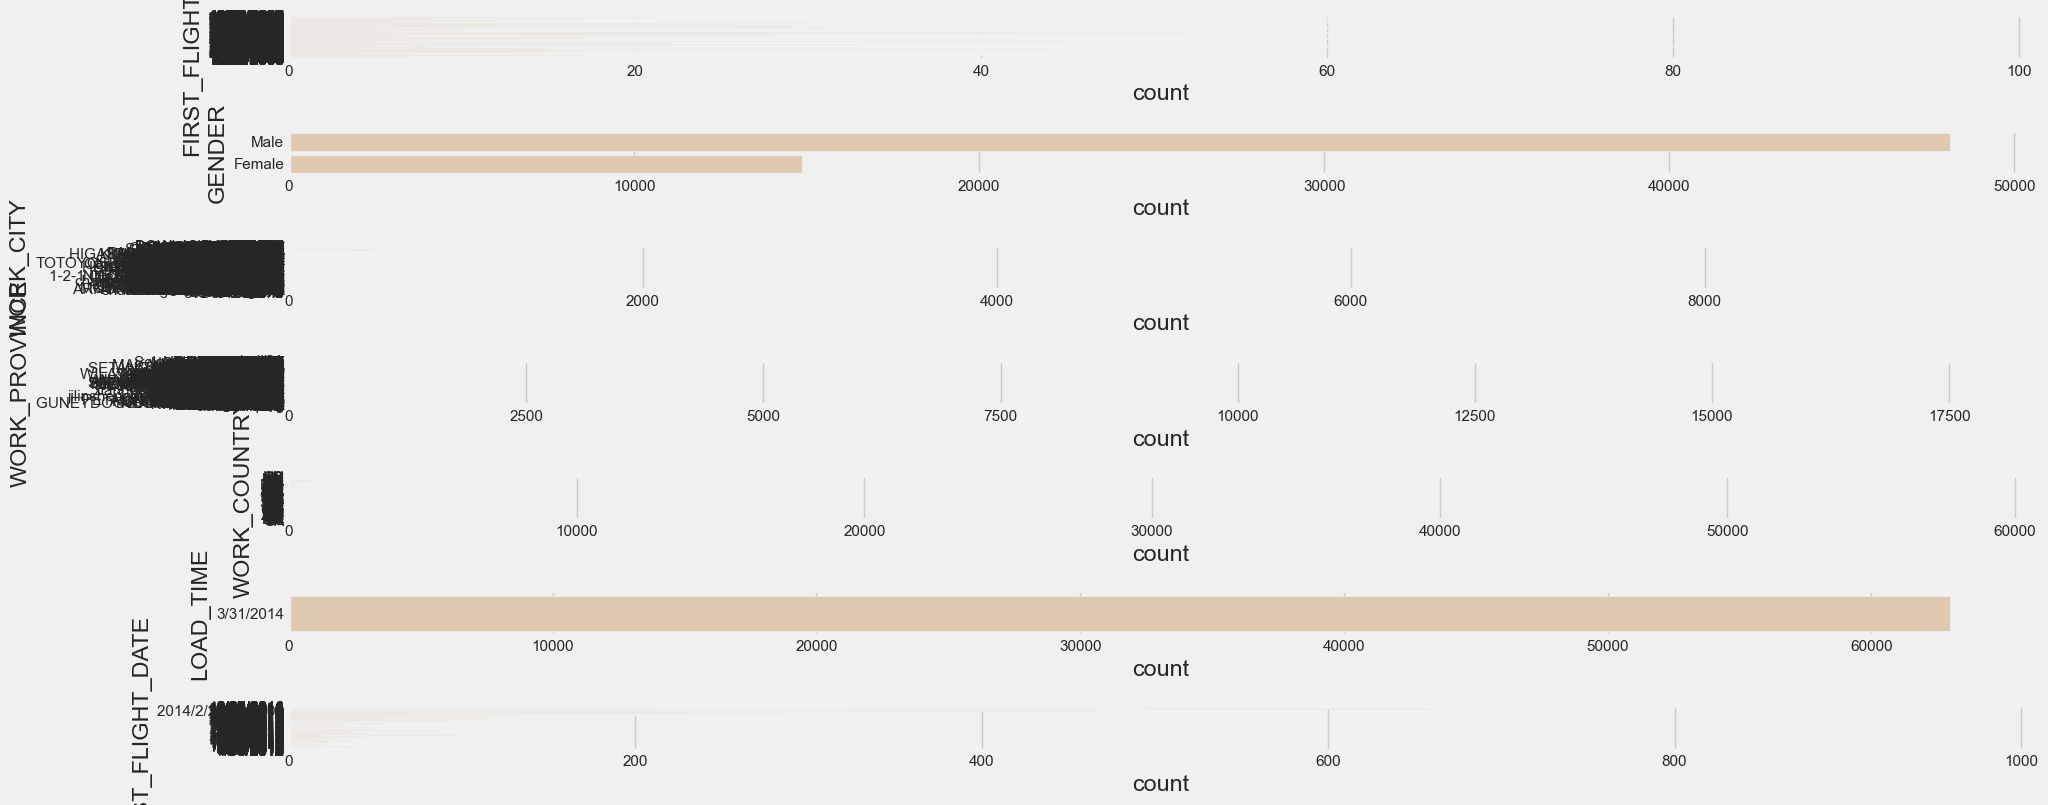

In [40]:
for i in range(0, len(cats)):
    plt.subplot(len(cats), 1, i+1)
    sns.countplot(y=df[cats[i]], color='#E7CBA9')
    plt.tight_layout()

# Multivariate Analysis

<Axes: >

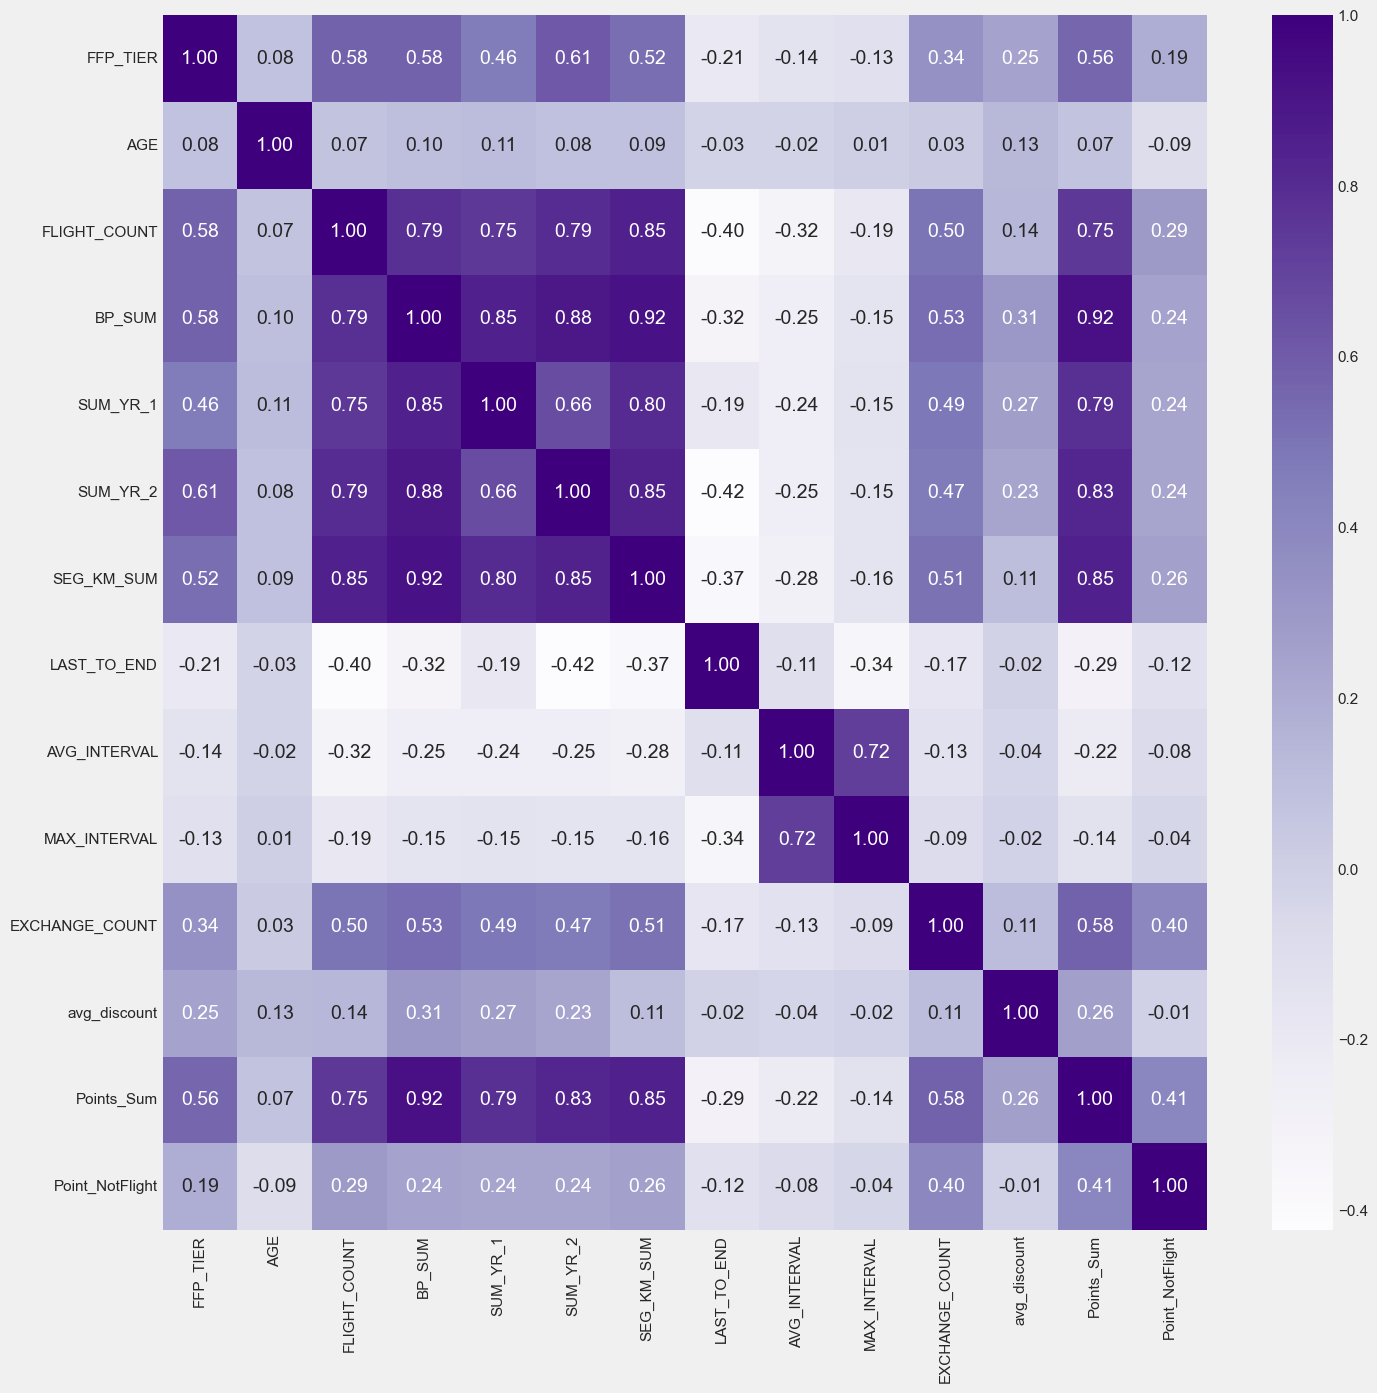

In [42]:
plt.figure(figsize=(15, 15))
sns.heatmap(df[num].corr(), cmap='Purples', annot=True, fmt='.2f')

# Data Cleansing

In [6]:
# Mengecek missing value ditiap fitur
x = df.shape[0]
missing_values_count = df.isnull().sum()
missing_values_count

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [7]:
# Menghitung besarnya missing value dibandingkan keseluruhan data di dataset
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

percent_missing = round((total_missing/total_cells) * 100,2)
print(f'{percent_missing}%')

0.46%


In [8]:
# Imputasi fitur numerik yang memiliki nilai NULL/NaN
df['AGE'].fillna(df['AGE'].mean(), inplace=True)
df['SUM_YR_1'].fillna(df['SUM_YR_1'].mean(), inplace=True)
df['SUM_YR_2'].fillna(df['SUM_YR_2'].mean(), inplace=True)

In [9]:
# Imputasi fitur kategorik yang memiliki nilai NULL/NaN
df['WORK_CITY'].fillna(df['WORK_CITY'].mode()[0], inplace=True)
df['WORK_PROVINCE'].fillna(df['WORK_PROVINCE'].mode()[0], inplace=True)
df['WORK_COUNTRY'].fillna(df['WORK_COUNTRY'].mode()[0], inplace=True)

# Data Duplicate

In [27]:
df.duplicated().sum()

0

In [28]:
df.duplicated(subset=['MEMBER_NO'],keep=False).sum()

0

# Feature Engineering

# Modeling

## K-Means Clustering

In [ ]:
inertia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(df_std)
    inertia.append(kmeans.inertia_)

In [ ]:
sns.lineplot(x=range(1,11), y = inertia, color = 'purple')
sns.scatterplot(x=range(1,11), y = inertia, s = 50, color = 'blue')
circle = patches.Ellipse((5, 117000), width=0.18, height=10000, color='red', fill=False, linewidth=2)
plt.gca().add_patch(circle)
plt.gca().autoscale_view()
plt.show()

In [ ]:
round((pd.Series(inertia)/pd.Series(inertia).shift(-1))/pd.Series(inertia)*100,5)

Dapat dilihat dari evaluasi inertia n cluster dengan perubahan inertia yang signifikan adalah <>.

In [ ]:
kmeans = KMeans(n_clusters=<>, random_state=42)
kmeans.fit(df_std)
df_std['Labels'] = kmeans.labels_
df_std.sample(5)

In [ ]:
sns.pairplot(data=df_std, hue='Labels', diag_kind='kde', palette=(random.shuffle(colors)))
plt.tight_layout()

## PCA

In [ ]:
# Memisahkan dataframe Labels
y = pd.DataFrame(df_new['Labels'].values, columns=['Labels'])

In [ ]:
# Melakukan PCA
pca = PCA(n_components=2)

pca.fit(df_std)
pcas = pca.transform(df_std)

# Mengubah hasil pca ke dataframe
df_pca = pd.DataFrame(data = pcas, columns = ['PC1', 'PC2'])
df_pca.describe()

In [ ]:
# Menggabungkan dataframe df_pca dan y
df_pca['Labels'] = y
df_pca.sample(5)

In [ ]:
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Labels", palette=(random.shuffle(colors)))
plt.title('Customer Segmentation Based on LRFMC Model')

# Analysis and Business Insight